# Holiday Spend Project

Overview:
- In this project, *"2022/W52: Average holiday Spending by Americans.xlsx"* by [@vizwiz](https://data.world/vizwiz) will be loaded into a machine learning pipeline in order to analyse customer spending behavor when on vacation. 

Goal:
- Analyse the accuracy of the machine learning model by comparing real and predicted target data. 

Steps:
1. Import machine learning packages and source [data.](https://data.world/makeovermonday/2022w52)
2. Explore the data set.
3. Apply pre-processing.
4. Create regression model.
5. Evaluate best model.
6. Fit data to best model
7. Predict on best model.
8. Measure key metrics and visualise prediction. 

## 1. Importing the Dataset

In [28]:
# Import data ingestion packages
import ssl
import pandas as pd
import numpy as np

# Download and displat dataset
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_excel('https://query.data.world/s/dleaebmqje3gaylsu33w6bgq36sbxr?dws=00000')
df.head()

,Year,Gifts for Family,Gifts for Friends,Gifts for Coworkers,Other Gifts
0,2004,405,71,22,41
1,2005,419,79,21,44
2,2006,428,81,21,42
3,2007,434,83,21,35
4,2008,389,79,22,36


## 2. Explore the Dataset

In [29]:
# Check for non-nulls
print(df.info())

# Check statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 18 non-null     int64
 1   Gifts for Family     18 non-null     int64
 2   Gifts for Friends    18 non-null     int64
 3   Gifts for Coworkers  18 non-null     int64
 4   Other Gifts          18 non-null     int64
dtypes: int64(5)
memory usage: 848.0 bytes
None


,Year,Gifts for Family,Gifts for Friends,Gifts for Coworkers,Other Gifts
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2012.500000,448.277778,77.222222,24.277778,33.333333
std,5.338539,41.834134,4.413289,4.141690,5.573044
min,2004.000000,387.000000,67.000000,19.000000,25.000000
25%,2008.250000,420.000000,75.000000,21.250000,29.000000
50%,2012.500000,433.000000,79.000000,24.500000,33.000000
75%,2016.750000,484.000000,80.000000,26.000000,36.000000
max,2021.000000,514.000000,84.000000,35.000000,44.000000


## 3. Apply Preprocessing

In [30]:
# Sum total gift amount for each year
df["Total"] = df.sum(axis=1)

# Reduce dimensionality
df = df[["Year", "Total"]]
df.head()

,Year,Total
0,2004,2543
1,2005,2568
2,2006,2578
3,2007,2580
4,2008,2534


## 4. Create Regression Model

In [31]:
# Import machine learning packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Extract feature and target variables from data
X = df.drop(columns="Total")
y = df["Total"]

print(y)

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create forest estimator
forest_estimator = RandomForestRegressor()

# Create and configure forest cross validation model
forest_grid_param = {"n_estimators" : [1, 5, 10, 25, 50, 75, 100]}
forest_grid_CV = GridSearchCV(estimator=forest_estimator, param_grid=forest_grid_param, verbose=2)

# Fit the cross_validator model
forest_grid_CV.fit(X_train, y_train)

0     2543
1     2568
2     2578
3     2580
4     2534
5     2517
6     2551
7     2554
8     2562
9     2572
10    2609
11    2620
12    2637
13    2624
14    2656
15    2677
16    2670
17    2669
Name: Total, dtype: int64
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1, 5, 10, 25, 50, 75, 100]},
             verbose=2)

## 5. Evaluate best model

In [32]:
forest_cv_results = pd.DataFrame(forest_grid_CV.cv_results_).sort_values(by="rank_test_score")
forest_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.009603,0.001521,0.002902,0.000495,5,{'n_estimators': 5},0.710017,0.619264,0.635841,0.981567,0.919819,0.773302,0.149311,1
6,0.112129,0.008566,0.006304,0.000883,100,{'n_estimators': 100},0.740527,0.670790,0.700742,0.738582,0.985614,0.767251,0.112202,2
4,0.076335,0.005254,0.006549,0.001617,50,{'n_estimators': 50},0.761312,0.706546,0.663896,0.606499,0.976684,0.742987,0.127407,3
3,0.037469,0.001508,0.005320,0.001475,25,{'n_estimators': 25},0.683018,0.660076,0.687210,0.632236,0.985429,0.729594,0.129405,4
5,0.100928,0.014683,0.007334,0.001941,75,{'n_estimators': 75},0.608751,0.702327,0.666352,0.696061,0.967735,0.728245,0.124236,5
2,0.018343,0.001784,0.003792,0.001982,10,{'n_estimators': 10},0.730704,0.774399,0.688227,0.313534,0.987438,0.698860,0.218443,6
0,0.005012,0.001919,0.002386,0.000529,1,{'n_estimators': 1},0.816833,0.440483,0.580545,-0.119339,0.962812,0.536267,0.374596,7


## 6. Fit data to best model

In [33]:
# Select best estimator
best_forest_estimator = forest_grid_CV.best_estimator_
best_forest_estimator.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5)

## 7. Predict on best model

In [34]:
# Predict target values
y_pred = best_forest_estimator.predict(X_test)
y_pred

array([2567.8, 2567.8, 2553.4, 2545.4, 2567.8, 2645. ])

## 8. Display key metrics and visualisation

In [35]:
# Import key metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Print key metrics
print("Mean squared error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean absolute error: ", round(mean_absolute_error(y_test, y_pred),2))

# Create table comparison of real and predicted targets
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame({"Total (Predicted)" : y_pred}).set_index(y_test.index)
df_forest = pd.concat([X_test, y_test, y_pred], axis=1).sort_values(by="Year")
df_forest

Mean squared error:  347.57
Mean absolute error:  15.87


,Year,Total,Total (Predicted)
0,2004,2543,2567.8
1,2005,2568,2567.8
3,2007,2580,2567.8
5,2009,2517,2545.4
8,2012,2562,2553.4
13,2017,2624,2645.0


<Axes: title={'center': 'Vacation Spend: Real Total vs Predicted Total'}, xlabel='Year'>

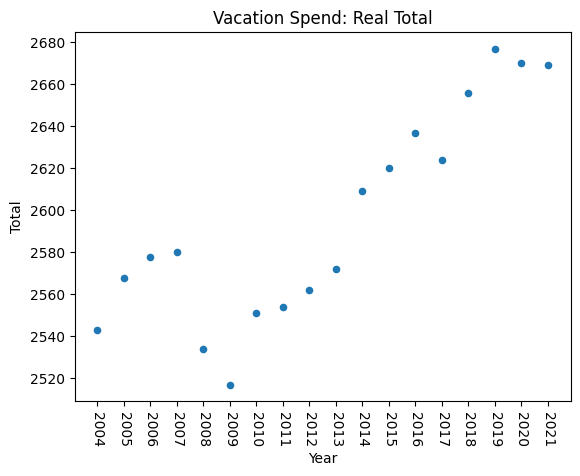

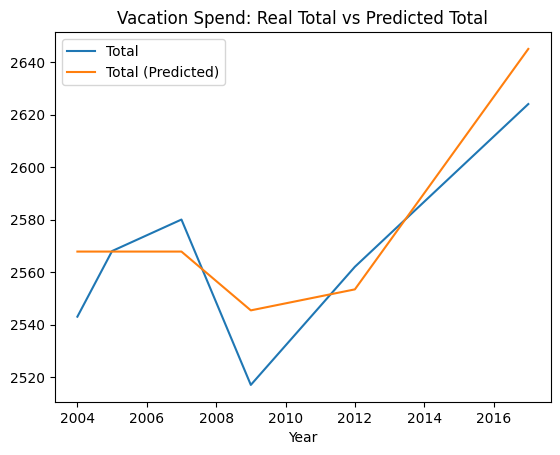

In [36]:
# Visualise source data as scatter plot
df.plot(kind='scatter', x="Year", y='Total', xticks = df["Year"], rot=-90, title="Vacation Spend: Real Total")

# Visualise machine learning model as line plot
df_forest.plot(kind="line", x="Year", y=["Total", "Total (Predicted)"], title="Vacation Spend: Real Total vs Predicted Total")